<a href="https://colab.research.google.com/github/tallwin/Text-Mining-amazon/blob/main/Amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import requests
from bs4 import BeautifulSoup as bs
from selenium import webdriver

In [ ]:
ipad_mini=[]

In [ ]:
#extracting amazon product reviews
for i in range (1,100):
    ipad=[]
    url="https://www.amazon.in/2021-Apple-iPad-Bionic-Wi-Fi/product-reviews/B09G93K5D5/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"+str(i)
    response=requests.get(url)
    soup=bs(response.content,"html.parser")
    reviews=soup.findAll("span",attrs={"class","a-size-base review-text review-text-content"})
    for i in range (len(reviews)):
        ipad.append(reviews[i].text)
    ipad_mini=ipad_mini+ipad  

In [ ]:
ipad_mini

["\n\n  Update:For people complaining unnecessarily of jelly scroll, have not used an LCD panel before. This is a phenomenon seen in all LCDs that refresh at 60 hz including othet brand tablets and other ipads like ipad Air 4. Its just that the refresh controller on the ipad mini 6 is placed vertically in portrait mode and horizontally in landscape mode. Where as it is it is opposite in ipad Air 4 due to space challenges inside. So ipad Air 4 will jelly scroll when in landscape mode. Google gives more info on this subject. Even my samsung fold 3 for 1.4 lakhs also jelly scrolls.For battery, i do get 9-10 hrs at medium brightness so no complaints in that department. In 43k you get A15 chip with latest hardware and a usb c. Unfortunately we have either 64gb or 256gb model, but 64 gigs also suffices as we have a usb c port. I am able to transfer the data directly to a usb c pen drive easily.Original review:The new 6th Gen iPad Mini (2021) has several upgrades over the previous iPad Mini, 

In [ ]:
len(ipad_mini)

290

In [ ]:
review={"review":ipad_mini}

In [ ]:
review_data=pd.DataFrame.from_dict(review)
pd.set_option('max_colwidth',500)

In [ ]:
review_data

,review
0,"\n\n Update:For people complaining unnecessarily of jelly scroll, have not used an LCD panel before. This is a phenomenon seen in all LCDs that refresh at 60 hz including othet brand tablets and other ipads like ipad Air 4. Its just that the refresh controller on the ipad mini 6 is placed vertically in portrait mode and horizontally in landscape mode. Where as it is it is opposite in ipad Air 4 due to space challenges inside. So ipad Air 4 will jelly scroll when in landscape mode. Google gi..."
1,"\n\n Unfortunately, I couldn't buy this from Amazon as they didn't have stock. I had to buy it from Reliance Digital which doesn't even have a return policy while it unethically accepted pre booking. However, my experience and opinion is fairly given.One of the most hyped launch. This size doesn't fit all the use cases. It is mainly meant for reading, browsing, media consumption and gaming and is NOT meant for serious productivity applications due to the small screen estate.Pros:Excellent A..."
2,\n\n Go for it. You won't regret it. From camera to performance and display everything is just awesome 😍🔥 I use for video editing and gaming\n\n
3,"\n\n The smaller the size the bigger the performance, it's the best iPad till date as per my opinion.The only con is the iPad is not for the people who want to have iPad as a cell phone I.e. you cannot call or text through iPad irrespective of the cellular modal otherwise it's and outstanding piece.\n\n"
4,"\n\n 64 gb is not enough and 256 is overpriced in india, it should have been priced less than 50K. i bought it just for the form factor.\n\n"
...,...
285,"\n\n Update:For people complaining unnecessarily of jelly scroll, have not used an LCD panel before. This is a phenomenon seen in all LCDs that refresh at 60 hz including othet brand tablets and other ipads like ipad Air 4. Its just that the refresh controller on the ipad mini 6 is placed vertically in portrait mode and horizontally in landscape mode. Where as it is it is opposite in ipad Air 4 due to space challenges inside. So ipad Air 4 will jelly scroll when in landscape mode. Google gi..."
286,"\n\n Unfortunately, I couldn't buy this from Amazon as they didn't have stock. I had to buy it from Reliance Digital which doesn't even have a return policy while it unethically accepted pre booking. However, my experience and opinion is fairly given.One of the most hyped launch. This size doesn't fit all the use cases. It is mainly meant for reading, browsing, media consumption and gaming and is NOT meant for serious productivity applications due to the small screen estate.Pros:Excellent A..."
287,\n\n Go for it. You won't regret it. From camera to performance and display everything is just awesome 😍🔥 I use for video editing and gaming\n\n
288,"\n\n The smaller the size the bigger the performance, it's the best iPad till date as per my opinion.The only con is the iPad is not for the people who want to have iPad as a cell phone I.e. you cannot call or text through iPad irrespective of the cellular modal otherwise it's and outstanding piece.\n\n"


In [ ]:
text=" ".join(review_data)

In [ ]:
#cleaning the data
def clean_text(text):
    text=re.sub('@[A-Za-z0-9]+','',str(text))#To remove @
    text=re.sub('#','',str(text))#To remove #
    text=re.sub('RT[\s]+','',str(text))#To remove retweets
    text=re.sub('\n\n','',str(text))  #To remove \n
    text=text.lower()
    text=re.sub('https?:\/\/\S+','',str(text)) #To remove links
    
    return text
review_data["review"]=review_data["review"].apply(clean_text)

In [ ]:
review_data

,review
0,"update:for people complaining unnecessarily of jelly scroll, have not used an lcd panel before. this is a phenomenon seen in all lcds that refresh at 60 hz including othet brand tablets and other ipads like ipad air 4. its just that the refresh controller on the ipad mini 6 is placed vertically in portrait mode and horizontally in landscape mode. where as it is it is opposite in ipad air 4 due to space challenges inside. so ipad air 4 will jelly scroll when in landscape mode. google gives ..."
1,"unfortunately, i couldn't buy this from amazon as they didn't have stock. i had to buy it from reliance digital which doesn't even have a return policy while it unethically accepted pre booking. however, my experience and opinion is fairly given.one of the most hyped launch. this size doesn't fit all the use cases. it is mainly meant for reading, browsing, media consumption and gaming and is not meant for serious productivity applications due to the small screen estate.pros:excellent a15 b..."
2,go for it. you won't regret it. from camera to performance and display everything is just awesome 😍🔥 i use for video editing and gaming
3,"the smaller the size the bigger the performance, it's the best ipad till date as per my opinion.the only con is the ipad is not for the people who want to have ipad as a cell phone i.e. you cannot call or text through ipad irrespective of the cellular modal otherwise it's and outstanding piece."
4,"64 gb is not enough and 256 is overpriced in india, it should have been priced less than 50k. i bought it just for the form factor."
...,...
285,"update:for people complaining unnecessarily of jelly scroll, have not used an lcd panel before. this is a phenomenon seen in all lcds that refresh at 60 hz including othet brand tablets and other ipads like ipad air 4. its just that the refresh controller on the ipad mini 6 is placed vertically in portrait mode and horizontally in landscape mode. where as it is it is opposite in ipad air 4 due to space challenges inside. so ipad air 4 will jelly scroll when in landscape mode. google gives ..."
286,"unfortunately, i couldn't buy this from amazon as they didn't have stock. i had to buy it from reliance digital which doesn't even have a return policy while it unethically accepted pre booking. however, my experience and opinion is fairly given.one of the most hyped launch. this size doesn't fit all the use cases. it is mainly meant for reading, browsing, media consumption and gaming and is not meant for serious productivity applications due to the small screen estate.pros:excellent a15 b..."
287,go for it. you won't regret it. from camera to performance and display everything is just awesome 😍🔥 i use for video editing and gaming
288,"the smaller the size the bigger the performance, it's the best ipad till date as per my opinion.the only con is the ipad is not for the people who want to have ipad as a cell phone i.e. you cannot call or text through ipad irrespective of the cellular modal otherwise it's and outstanding piece."


In [ ]:
text=" ".join(review_data["review"])
text

'  update:for people complaining unnecessarily of jelly scroll, have not used an lcd panel before. this is a phenomenon seen in all lcds that refresh at 60 hz including othet brand tablets and other ipads like ipad air 4. its just that the refresh controller on the ipad mini 6 is placed vertically in portrait mode and horizontally in landscape mode. where as it is it is opposite in ipad air 4 due to space challenges inside. so ipad air 4 will jelly scroll when in landscape mode. google gives more info on this subject. even my samsung fold 3 for 1.4 lakhs also jelly scrolls.for battery, i do get 9-10 hrs at medium brightness so no complaints in that department. in 43k you get a15 chip with latest hardware and a usb c. unfortunately we have either 64gb or 256gb model, but 64 gigs also suffices as we have a usb c port. i am able to transfer the data directly to a usb c pen drive easily.original review:the new 6th gen ipad mini (2021) has several upgrades over the previous ipad mini, and n

In [ ]:
# Tokenization
text_tokens=word_tokenize(text)
text_tokens

['update',
 ':',
 'for',
 'people',
 'complaining',
 'unnecessarily',
 'of',
 'jelly',
 'scroll',
 ',',
 'have',
 'not',
 'used',
 'an',
 'lcd',
 'panel',
 'before',
 '.',
 'this',
 'is',
 'a',
 'phenomenon',
 'seen',
 'in',
 'all',
 'lcds',
 'that',
 'refresh',
 'at',
 '60',
 'hz',
 'including',
 'othet',
 'brand',
 'tablets',
 'and',
 'other',
 'ipads',
 'like',
 'ipad',
 'air',
 '4.',
 'its',
 'just',
 'that',
 'the',
 'refresh',
 'controller',
 'on',
 'the',
 'ipad',
 'mini',
 '6',
 'is',
 'placed',
 'vertically',
 'in',
 'portrait',
 'mode',
 'and',
 'horizontally',
 'in',
 'landscape',
 'mode',
 '.',
 'where',
 'as',
 'it',
 'is',
 'it',
 'is',
 'opposite',
 'in',
 'ipad',
 'air',
 '4',
 'due',
 'to',
 'space',
 'challenges',
 'inside',
 '.',
 'so',
 'ipad',
 'air',
 '4',
 'will',
 'jelly',
 'scroll',
 'when',
 'in',
 'landscape',
 'mode',
 '.',
 'google',
 'gives',
 'more',
 'info',
 'on',
 'this',
 'subject',
 '.',
 'even',
 'my',
 'samsung',
 'fold',
 '3',
 'for',
 '1.4',
 'la

In [ ]:
#stop words
text_stopword=[word for word in text_tokens if not word in stopwords.words()]

In [ ]:
tf=TfidfVectorizer()
text_tf=tf.fit_transform(text_stopword)

In [ ]:
feature_names=tf.get_feature_names()
dense=text_tf.todense()
denselist=dense.tolist()
df=pd.DataFrame(denselist,columns=feature_names)

In [ ]:
df

,10,100,12,128,12mp,14,15,15k,16,175,...,way,web,well,wifi,with,wobbling,works,worse,worth,you
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50049,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50052,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
words_list=" ".join(df)

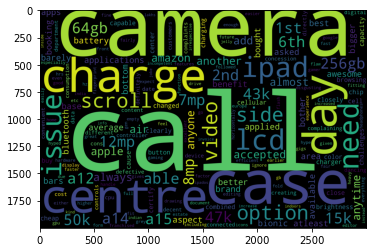

In [ ]:
wordcloud=WordCloud(background_color="black",width=3000,height=2000).generate(words_list)
plt.imshow(wordcloud)

In [ ]:
#positive words
with open ("E:/Data sciences notes/Assignment/Text Mining/positive-words.txt") as pw:
    postive_word=pw.read().split("/n")
postive_word=postive_word[35:]

In [ ]:
postive=" ".join([word for word in df if not word in postive_word])

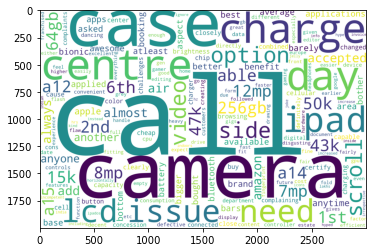

In [ ]:
postive_wordcloud=WordCloud(background_color="white",width=3000,height=2000).generate(postive)
plt.imshow(postive_wordcloud)

In [ ]:
#negative words
with open ("E:/Data sciences notes/Assignment/Text Mining/negative-words.txt") as nw:
    negative_word=nw.read().split("/n")
negative_word=negative_word[35:]

In [ ]:
negative=" ".join([word for word in df if not word in negative_word])

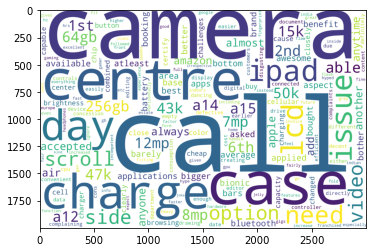

In [ ]:
negative_wordcloud=WordCloud(background_color="white",width=3000,height=2000).generate(negative)
plt.imshow(negative_wordcloud)

In [ ]:
from textblob import TextBlob
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["review"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

review_data[["subjectivity", "polarity"]] = review_data.apply(sentiment_analysis, axis=1)
review_data

,review,subjectivity,polarity
0,"update:for people complaining unnecessarily of jelly scroll, have not used an lcd panel before. this is a phenomenon seen in all lcds that refresh at 60 hz including othet brand tablets and other ipads like ipad air 4. its just that the refresh controller on the ipad mini 6 is placed vertically in portrait mode and horizontally in landscape mode. where as it is it is opposite in ipad air 4 due to space challenges inside. so ipad air 4 will jelly scroll when in landscape mode. google gives ...",0.383939,0.135230
1,"unfortunately, i couldn't buy this from amazon as they didn't have stock. i had to buy it from reliance digital which doesn't even have a return policy while it unethically accepted pre booking. however, my experience and opinion is fairly given.one of the most hyped launch. this size doesn't fit all the use cases. it is mainly meant for reading, browsing, media consumption and gaming and is not meant for serious productivity applications due to the small screen estate.pros:excellent a15 b...",0.453543,0.041129
2,go for it. you won't regret it. from camera to performance and display everything is just awesome 😍🔥 i use for video editing and gaming,1.000000,1.000000
3,"the smaller the size the bigger the performance, it's the best ipad till date as per my opinion.the only con is the ipad is not for the people who want to have ipad as a cell phone i.e. you cannot call or text through ipad irrespective of the cellular modal otherwise it's and outstanding piece.",0.635000,0.300000
4,"64 gb is not enough and 256 is overpriced in india, it should have been priced less than 50k. i bought it just for the form factor.",0.283333,-0.083333
...,...,...,...
285,"update:for people complaining unnecessarily of jelly scroll, have not used an lcd panel before. this is a phenomenon seen in all lcds that refresh at 60 hz including othet brand tablets and other ipads like ipad air 4. its just that the refresh controller on the ipad mini 6 is placed vertically in portrait mode and horizontally in landscape mode. where as it is it is opposite in ipad air 4 due to space challenges inside. so ipad air 4 will jelly scroll when in landscape mode. google gives ...",0.383939,0.135230
286,"unfortunately, i couldn't buy this from amazon as they didn't have stock. i had to buy it from reliance digital which doesn't even have a return policy while it unethically accepted pre booking. however, my experience and opinion is fairly given.one of the most hyped launch. this size doesn't fit all the use cases. it is mainly meant for reading, browsing, media consumption and gaming and is not meant for serious productivity applications due to the small screen estate.pros:excellent a15 b...",0.453543,0.041129
287,go for it. you won't regret it. from camera to performance and display everything is just awesome 😍🔥 i use for video editing and gaming,1.000000,1.000000
288,"the smaller the size the bigger the performance, it's the best ipad till date as per my opinion.the only con is the ipad is not for the people who want to have ipad as a cell phone i.e. you cannot call or text through ipad irrespective of the cellular modal otherwise it's and outstanding piece.",0.635000,0.300000


In [ ]:
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
review_data["analysis"] = review_data["polarity"].apply(analysis)
review_data

,review,subjectivity,polarity,analysis
0,"update:for people complaining unnecessarily of jelly scroll, have not used an lcd panel before. this is a phenomenon seen in all lcds that refresh at 60 hz including othet brand tablets and other ipads like ipad air 4. its just that the refresh controller on the ipad mini 6 is placed vertically in portrait mode and horizontally in landscape mode. where as it is it is opposite in ipad air 4 due to space challenges inside. so ipad air 4 will jelly scroll when in landscape mode. google gives ...",0.383939,0.135230,Positive
1,"unfortunately, i couldn't buy this from amazon as they didn't have stock. i had to buy it from reliance digital which doesn't even have a return policy while it unethically accepted pre booking. however, my experience and opinion is fairly given.one of the most hyped launch. this size doesn't fit all the use cases. it is mainly meant for reading, browsing, media consumption and gaming and is not meant for serious productivity applications due to the small screen estate.pros:excellent a15 b...",0.453543,0.041129,Positive
2,go for it. you won't regret it. from camera to performance and display everything is just awesome 😍🔥 i use for video editing and gaming,1.000000,1.000000,Positive
3,"the smaller the size the bigger the performance, it's the best ipad till date as per my opinion.the only con is the ipad is not for the people who want to have ipad as a cell phone i.e. you cannot call or text through ipad irrespective of the cellular modal otherwise it's and outstanding piece.",0.635000,0.300000,Positive
4,"64 gb is not enough and 256 is overpriced in india, it should have been priced less than 50k. i bought it just for the form factor.",0.283333,-0.083333,Negative
...,...,...,...,...
285,"update:for people complaining unnecessarily of jelly scroll, have not used an lcd panel before. this is a phenomenon seen in all lcds that refresh at 60 hz including othet brand tablets and other ipads like ipad air 4. its just that the refresh controller on the ipad mini 6 is placed vertically in portrait mode and horizontally in landscape mode. where as it is it is opposite in ipad air 4 due to space challenges inside. so ipad air 4 will jelly scroll when in landscape mode. google gives ...",0.383939,0.135230,Positive
286,"unfortunately, i couldn't buy this from amazon as they didn't have stock. i had to buy it from reliance digital which doesn't even have a return policy while it unethically accepted pre booking. however, my experience and opinion is fairly given.one of the most hyped launch. this size doesn't fit all the use cases. it is mainly meant for reading, browsing, media consumption and gaming and is not meant for serious productivity applications due to the small screen estate.pros:excellent a15 b...",0.453543,0.041129,Positive
287,go for it. you won't regret it. from camera to performance and display everything is just awesome 😍🔥 i use for video editing and gaming,1.000000,1.000000,Positive
288,"the smaller the size the bigger the performance, it's the best ipad till date as per my opinion.the only con is the ipad is not for the people who want to have ipad as a cell phone i.e. you cannot call or text through ipad irrespective of the cellular modal otherwise it's and outstanding piece.",0.635000,0.300000,Positive


In [ ]:
review_data['analysis'].value_counts()

Positive    232
Negative     58
Name: analysis, dtype: int64

In [ ]:
#positive comments
(232/290)*100

80.0

In [ ]:
#negative comments
(58/290)*100

20.0

so by analysing the data of the product,we recevied a 80% postive reviews and 20% neagative review from the customers,


So we conclude the product:apple ipad mini as the good product.